# Covid-19 in the Philippines

Data as of January 5, 2022

Source: DOH Data Drop

Metadata: https://docs.google.com/spreadsheets/d/1rD77PMdxN6JMVeYmk7mvgDNtEHJt8Du6ozaLm_Qok0Q/edit#gid=1714687638

We'll first process the cases data contained in three CSV files.

In [2]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 1000)
df = pd.concat(
    map(pd.read_csv, ['DOH COVID Data Drop_ 20220105 - 04 Case Information_batch_0.csv', 'DOH COVID Data Drop_ 20220105 - 04 Case Information_batch_1.csv', 'DOH COVID Data Drop_ 20220105 - 04 Case Information_batch_2.csv']), ignore_index=True)
df

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/reshape/concat.py:294: DtypeWarning: Columns (15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  op = _Concatenator(
/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/reshape/concat.py:294: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  op = _Concatenator(


,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,Admitted,RegionRes,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C404174,38.0,35 to 39,FEMALE,NaN,2020-01-30,2020-01-30,NaN,NaN,RECOVERED,NaN,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,"Health Status is ""Recovered"", but no Date Reco..."
1,C462688,44.0,40 to 44,MALE,NaN,2020-01-30,2020-02-03,2020-02-01,NaN,DIED,NaN,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,DIED,NO,2020-01-18,NaN,NaN
2,C387710,60.0,60 to 64,FEMALE,2020-01-23,2020-01-30,2020-02-05,NaN,2020-01-31,RECOVERED,YES,Region VII: Central Visayas,BOHOL,PANGLAO,PH071233000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,Case has Admitting Facility but is not Admitte...
3,C377460,49.0,45 to 49,MALE,NaN,NaN,2020-03-06,NaN,NaN,RECOVERED,YES,Region IV-A: CALABARZON,BATANGAS,SANTO TOMAS,PH041028000,NaN,NaN,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."
4,C498051,63.0,60 to 64,MALE,2020-03-05,NaN,2020-03-06,2020-03-11,NaN,DIED,NO,Region IV-A: CALABARZON,RIZAL,CAINTA,PH045805000,NaN,NaN,DIED,NO,NaN,NaN,"Case has Lab Result, but Result Date is blank"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871740,C20400219,35.0,35 to 39,FEMALE,2022-01-03,2022-01-03,2022-01-05,NaN,NaN,NaN,NaN,NCR,NCR,QUEZON CITY,PH137404000,SOCORRO,PH137404115,MILD,NO,NaN,NO,NaN
2871741,C23732165,40.0,40 to 44,FEMALE,2022-01-03,2022-01-04,2022-01-05,NaN,NaN,NaN,NaN,NCR,NCR,CALOOCAN CITY,PH137501000,BARANGAY 34,PH137501034,MILD,NO,NaN,NO,NaN
2871742,C3164432,29.0,25 to 29,FEMALE,2022-01-03,2022-01-03,2022-01-05,NaN,NaN,NaN,NaN,NCR,NCR,CALOOCAN CITY,PH137501000,BARANGAY 169,PH137501169,MILD,NO,NaN,NO,NaN
2871743,C20077084,17.0,15 to 19,FEMALE,2022-01-02,2022-01-03,2022-01-05,NaN,NaN,NaN,NaN,NCR,NCR,TAGUIG CITY,PH137607000,USUSAN,PH137607016,MILD,NO,2022-01-02,NO,NaN


We basically combined all three CSVs into one file. 
You can save this single file into a CSV if you want to. 

In [3]:
df.DateRepConf = pd.to_datetime(df.DateRepConf, format="%Y-%m-%d")
df.DateDied = pd.to_datetime(df.DateDied, format="%Y-%m-%d")
df.DateRecover = pd.to_datetime(df.DateRecover, format="%Y-%m-%d")
df.DateOnset = pd.to_datetime(df.DateOnset, format="%Y-%m-%d")
df.DateResultRelease = pd.to_datetime(df.DateResultRelease, format="%Y-%m-%d")
df.DateSpecimen = pd.to_datetime(df.DateSpecimen, format="%Y-%m-%d")

In [4]:
df.dtypes
#This checks whether we successfully converted the columns above into datetime.

CaseCode                     object
Age                         float64
AgeGroup                     object
Sex                          object
DateSpecimen         datetime64[ns]
DateResultRelease    datetime64[ns]
DateRepConf          datetime64[ns]
DateDied             datetime64[ns]
DateRecover          datetime64[ns]
RemovalType                  object
Admitted                     object
RegionRes                    object
ProvRes                      object
CityMunRes                   object
CityMuniPSGC                 object
BarangayRes                  object
BarangayPSGC                 object
HealthStatus                 object
Quarantined                  object
DateOnset            datetime64[ns]
Pregnanttab                  object
ValidationStatus             object
dtype: object

# Checking the data

Look for potential duplicates through the **Case Code** column. **True** means there are duplicates.

In [5]:
df.duplicated(subset=['CaseCode'])

0          False
1          False
2          False
3          False
4          False
           ...  
2871740    False
2871741    False
2871742    False
2871743    False
2871744    False
Length: 2871745, dtype: bool

There are also issues with **NaNs** which means there was no data input. We tackle the NaNs as we go through different columns of the database.

# Case data

Note: Just remove **.tail()** to get all dates here. **.tail()** shows the last entries while the number inside paranthesis signify how many last entries are shown. Default shows last 10 entries. Alternatively: **.head()**

## DateRepConf

Pertains to data when cases are publicly reported **(this is what is closely followed and reported in the media).** Caveat is this can include case positives from previous days because of delays in test processing and reporting.

For instance, cases may be reported on January 2, but based on testing data on December 31.

Furthemore, data from previous days may be subject to change as DOH said it is constantly reviewing the reports' veracity and removing some potential duplicates.

In [6]:
df.resample('D', on='DateRepConf').CaseCode.count().tail(10)

DateRepConf
2021-12-27      316
2021-12-28      410
2021-12-29      888
2021-12-30     1619
2021-12-31     2951
2022-01-01     3615
2022-01-02     4599
2022-01-03     4082
2022-01-04     5432
2022-01-05    10775
Freq: D, Name: CaseCode, dtype: int64

# Two week rolling case average

In [7]:
df.resample('D', on='DateRepConf').CaseCode.count().rolling(14).mean().round().tail(10)

DateRepConf
2021-12-27     307.0
2021-12-28     319.0
2021-12-29     366.0
2021-12-30     461.0
2021-12-31     630.0
2022-01-01     868.0
2022-01-02    1182.0
2022-01-03    1455.0
2022-01-04    1831.0
2022-01-05    2582.0
Freq: D, Name: CaseCode, dtype: float64

Text(0, 0.5, 'Cases')

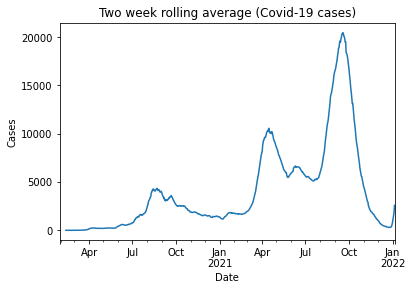

In [51]:
ax = df.resample('D', on='DateRepConf').CaseCode.count().rolling(14).mean().plot(title='Two week rolling average (Covid-19 cases)')
ax.set_xlabel("Date")
ax.set_ylabel("Cases")

## DateOnset

Pertains to cases when date of illness or when symptoms manifest. Sometimes, people are not tested until cases manifest and processing of cases take time. DateOnset records cases based on when the illness first manifested, not when test results were released.

DOH said when DateOnset cannot be confirmed, the agency uses DateSpecimen (date of specimen collection for testing, see below) as proxy.

In [8]:
df.resample('D', on='DateOnset').CaseCode.count().tail(10)

DateOnset
2021-12-25    164
2021-12-26    215
2021-12-27    384
2021-12-28    430
2021-12-29    646
2021-12-30    636
2021-12-31    569
2022-01-01    575
2022-01-02    423
2022-01-03    145
Name: CaseCode, dtype: int64

## DateSpecimen

Pertains to when specimen was collected from suspected case for Covid-19 testing. Data show those who tested positive after testing, but date used to report case is based on when the specimen is collected, instead of when results came out positive.

DOH said when DateOnset cannot be confirmed, the agency uses DateSpecimen (date of specimen collection for testing) as proxy.

In [9]:
df.resample('D', on='DateSpecimen').CaseCode.count().tail(10)

DateSpecimen
2021-12-26     711
2021-12-27    1532
2021-12-28    2515
2021-12-29    3620
2021-12-30    4376
2021-12-31    4845
2022-01-01    4321
2022-01-02    7289
2022-01-03    4320
2022-01-04       8
Name: CaseCode, dtype: int64

## DateRecover

Pertains to date when cases recovered from Covid-19. Not used in reporting "recoveries" data every day. 

In [12]:
df[df.RemovalType=="RECOVERED"].resample('D', on='DateRecover').size().tail(10)

DateRecover
2021-12-23    14
2021-12-24    23
2021-12-25    25
2021-12-26     9
2021-12-27    19
2021-12-28    30
2021-12-29    27
2021-12-30    30
2021-12-31     3
2022-01-01     1
dtype: int64

## DateDied

Pertains to date when cases died from Covid-19. Not used in reporting "deaths" data every day. 

In [13]:
df[df.RemovalType=="DIED"].resample('D', on='DateDied').size().tail(10)

DateDied
2021-12-23     5
2021-12-24     2
2021-12-25     2
2021-12-26     1
2021-12-27     3
2021-12-28     6
2021-12-29    10
2021-12-30     3
2021-12-31     8
2022-01-01     2
dtype: int64

Note: Clearly when used to resample, DateRecovered and DateDied columns underestimate both figures as reported. This can be due to a number of reasons, including some deaths and recoveries bearing no date.

# Which regions have the highest number of Covid-19 cases so far?

In [13]:
df.RegionRes.value_counts(normalize=True, dropna=False) * 100
#ROF stands for returning overseas Filipinos
#0.11% have no indicated regional location.

NCR                               30.823802
Region IV-A: CALABARZON           17.506220
Region III: Central Luzon          9.892940
Region VII: Central Visayas        5.387247
Region VI: Western Visayas         5.320284
Region II: Cagayan Valley          4.817280
Region XI: Davao Region            3.722998
Region I: Ilocos Region            3.677381
CAR                                3.241757
Region X: Northern Mindanao        2.990238
Region XII: SOCCSKSARGEN           2.100848
Region IX: Zamboanga Peninsula     1.876420
Region VIII: Eastern Visayas       1.862387
Region V: Bicol Region             1.811512
CARAGA                             1.776690
Region IV-B: MIMAROPA              1.317352
ROF                                1.066808
BARMM                              0.692018
NaN                                0.115818
Name: RegionRes, dtype: float64

Interpretation: Nearly half-- or about 48%-- of Covid-19 cases were detected in Metro Manila and Calabarzon.

# Which provinces have the highest number of Covid-19 cases so far?

In [14]:
df.ProvRes.value_counts(dropna=False, normalize=True) * 100
#Over 42,000 (1.5%) have no information into provincial location.

NCR                                 30.588614
CAVITE                               5.731219
LAGUNA                               4.364733
CEBU                                 3.791110
RIZAL                                3.704472
BULACAN                              3.697508
BATANGAS                             2.592674
PAMPANGA                             2.415709
DAVAO DEL SUR                        2.328306
NEGROS OCCIDENTAL                    2.091307
ISABELA                              2.081069
ILOILO                               2.071423
CAGAYAN                              1.841250
BENGUET                              1.816944
PANGASINAN                           1.570961
NaN                                  1.474852
MISAMIS ORIENTAL                     1.305896
ZAMBOANGA DEL SUR                    1.275844
SOUTH COTABATO                       1.185516
NUEVA ECIJA                          1.124926
BATAAN                               1.110126
QUEZON                            

# Which municipalities?

In [77]:
df.CityMunRes.value_counts(dropna=False, normalize=True).head(25) * 100
#Over 55,000 (nearly 2%) people infected have no information on their municipal location.

QUEZON CITY                   6.343878
CITY OF MANILA                3.813500
CALOOCAN CITY                 2.278336
TAGUIG CITY                   2.240345
CITY OF PASIG                 2.161717
CITY OF MAKATI                2.093675
NaN                           1.946900
DAVAO CITY                    1.914376
CITY OF PARAÑAQUE             1.763597
CEBU CITY (CAPITAL)           1.489234
CITY OF VALENZUELA            1.392080
PASAY CITY                    1.381007
CITY OF LAS PIÑAS             1.272745
CITY OF MANDALUYONG           1.197425
BAGUIO CITY                   1.056431
CITY OF MUNTINLUPA            1.054864
BACOOR CITY                   1.050337
CITY OF ANTIPOLO (CAPITAL)    1.030245
CITY OF MARIKINA              0.989433
CITY OF DASMARIÑAS            0.874729
BACOLOD CITY (CAPITAL)        0.850702
ZAMBOANGA CITY                0.838898
IMUS CITY                     0.838723
CITY OF MALABON               0.833256
ILOILO CITY (CAPITAL)         0.795440
Name: CityMunRes, dtype: 

Interpretation: Six cities from Metro Manila top the list of number of people infected with Covid-19. Davao City in Mindanao follow them.

# How is a location's infection tally through time?

Applicable for provinces, municipalities, regions.

In [14]:
#Example for region
df[df.RegionRes=="NCR"].resample('D', on='DateRepConf').CaseCode.count().tail(10)

DateRepConf
2021-12-27     120
2021-12-28     169
2021-12-29     566
2021-12-30    1110
2021-12-31    1984
2022-01-01    2540
2022-01-02    3345
2022-01-03    2861
2022-01-04    3847
2022-01-05    7479
Freq: D, Name: CaseCode, dtype: int64

In [15]:
#Example for municipalities
df[df.CityMunRes=="CITY OF PASIG"].resample('D', on='DateRepConf').CaseCode.count().tail(10)

DateRepConf
2021-12-27      5
2021-12-28      4
2021-12-29     14
2021-12-30     41
2021-12-31     75
2022-01-01    104
2022-01-02    115
2022-01-03    126
2022-01-04    276
2022-01-05    439
Freq: D, Name: CaseCode, dtype: int64

<AxesSubplot:title={'center':'Pasig City cases'}, xlabel='DateRepConf'>

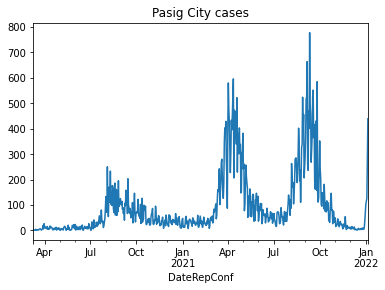

In [18]:
df[df.CityMunRes=="CITY OF PASIG"].resample('D', on='DateRepConf').CaseCode.count().plot(title="Pasig City cases")

# How young/old are the infected?

In [49]:
df.AgeGroup.value_counts(normalize=True, dropna=False) * 100
#0.1% of people infected did not indicate age.

25 to 29    13.749271
30 to 34    12.299107
20 to 24    10.140350
35 to 39     9.554330
40 to 44     8.255329
45 to 49     6.898767
50 to 54     6.492185
55 to 59     5.851738
60 to 64     4.674336
15 to 19     4.622312
65 to 69     3.553449
10 to 14     3.196697
70 to 74     2.590794
5 to 9       2.369430
0 to 4       2.269143
80+          1.844941
75 to 79     1.546830
NaN          0.090990
Name: AgeGroup, dtype: float64

Text(0, 0.5, 'Cases')

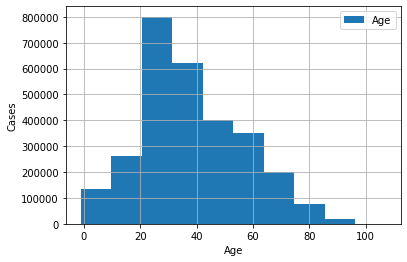

In [50]:
ax= df.Age.hist(legend=True)
ax.set_xlabel("Age")
ax.set_ylabel("Cases")

# How many males and females? How many are admitted to hospital?

**normalize=True** will get you the percentage share.

In [21]:
df.Sex.value_counts(dropna=False, normalize=True) * 100
#Nearly equal number of females and males infected with Covid-19

FEMALE    50.096997
MALE      49.903003
Name: Sex, dtype: float64

In [22]:
df.Admitted.value_counts(dropna=False)
#NaN means no answer

NaN    1825906
NO      935405
YES     110434
Name: Admitted, dtype: int64

# Testing

We now go to testing data, which is contained in a separate CSV file from the DOH Data Drop. We read through the file first.

Notice again how there are **NaNs** in some rows. Some of them you can ignore because of the type of data (i.e. **daily_output_unique_individuals** where NaN essentially means there were no test conducted that day.

You can check whether they have a significant impact on the broader picture by running **isna** in certain columns or putting **dropna=False** in your **value_counts**.

Try this:
df[df.daily_output_unique_individuals.isna()]

In [18]:
df2= pd.read_csv("DOH COVID Data Drop_ 20220105 - 07 Testing Aggregates.csv")
df2

,facility_name,report_date,avg_turnaround_time,daily_output_samples_tested,daily_output_unique_individuals,daily_output_positive_individuals,daily_output_negative_individuals,daily_output_equivocal,daily_output_invalid,remaining_available_tests,backlogs,cumulative_samples_tested,cumulative_unique_individuals,cumulative_positive_individuals,cumulative_negative_individuals,pct_positive_cumulative,pct_negative_cumulative,validation_status
0,A Star Laboratories,2020-12-08,24.0,15.0,15.0,1.0,14.0,0.0,0.0,8.0,0.0,15,15,1,14,0.07,0.93,NaN
1,A Star Laboratories,2020-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
2,A Star Laboratories,2020-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
3,A Star Laboratories,2020-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
4,A Star Laboratories,2020-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122580,Zamboanga del Sur Medical Center PCR Laboratory,2021-12-31,48.0,6.0,6.0,0.0,6.0,0.0,0.0,7669.0,0.0,34067,33722,8830,24892,0.26,0.74,NaN
122581,Zamboanga del Sur Medical Center PCR Laboratory,2022-01-01,48.0,54.0,54.0,2.0,52.0,0.0,0.0,7595.0,0.0,34121,33776,8832,24944,0.26,0.74,NaN
122582,Zamboanga del Sur Medical Center PCR Laboratory,2022-01-02,48.0,15.0,15.0,1.0,14.0,0.0,0.0,0.0,0.0,34136,33791,8833,24958,0.26,0.74,NaN
122583,Zamboanga del Sur Medical Center PCR Laboratory,2022-01-03,48.0,0.0,0.0,0.0,0.0,0.0,0.0,7570.0,0.0,34136,33791,8833,24958,0.26,0.74,NaN


# Transform dates to datetime format

In [19]:
df2.dtypes
#Meant to check what type of data are we dealing about. Our concern here are the dates.
#We need to convert them to datetime format from object format to allow us to analyze data through time.

facility_name                         object
report_date                           object
avg_turnaround_time                  float64
daily_output_samples_tested          float64
daily_output_unique_individuals      float64
daily_output_positive_individuals    float64
daily_output_negative_individuals    float64
daily_output_equivocal               float64
daily_output_invalid                 float64
remaining_available_tests            float64
backlogs                             float64
cumulative_samples_tested              int64
cumulative_unique_individuals          int64
cumulative_positive_individuals        int64
cumulative_negative_individuals        int64
pct_positive_cumulative              float64
pct_negative_cumulative              float64
validation_status                     object
dtype: object

In [20]:
df2.report_date = pd.to_datetime(df2.report_date, format="%Y-%m-%d", errors="coerce")

# Total number of people tested for Covid-19 daily

Arranged from highest to lowest per day

In [21]:
df2.resample('D', on='report_date').daily_output_unique_individuals.sum().sort_values(ascending=False).tail(10)

report_date
2020-04-19    2317.0
2020-04-03    2280.0
2020-04-09    1989.0
2020-04-14    1829.0
2020-04-12    1710.0
2020-04-06    1700.0
2020-04-07    1685.0
2020-04-11    1302.0
2020-04-10    1244.0
2020-04-05     344.0
Name: daily_output_unique_individuals, dtype: float64

Interpretation: This only shows lowest 10 days of testing over the entire period covered by the data.

Text(0, 0.5, 'Cases')

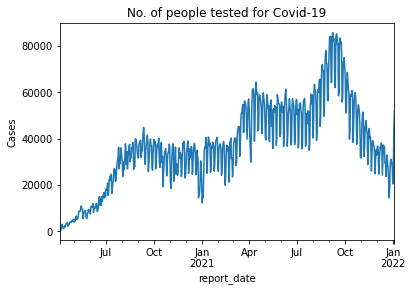

In [52]:
ax= df2.resample('D', on='report_date').daily_output_unique_individuals.sum().plot(title="No. of people tested for Covid-19")
ax.set_ylabel("Cases")


Interpretation: Number of people getting tested for Covid-19 daily have gone down
from their September peak of about 80,000 during a surge. 

# Two-week rolling average in testing

In [28]:
df2.resample('D', on='report_date').daily_output_unique_individuals.sum().rolling(14).mean().round().tail(20)

report_date
2021-12-16    33579.0
2021-12-17    33048.0
2021-12-18    32622.0
2021-12-19    32546.0
2021-12-20    32577.0
2021-12-21    32518.0
2021-12-22    32012.0
2021-12-23    31394.0
2021-12-24    30244.0
2021-12-25    28633.0
2021-12-26    28257.0
2021-12-27    28066.0
2021-12-28    27631.0
2021-12-29    27383.0
2021-12-30    26894.0
2021-12-31    26751.0
2022-01-01    26133.0
2022-01-02    26306.0
2022-01-03    27349.0
2022-01-04    28721.0
Freq: D, Name: daily_output_unique_individuals, dtype: float64

<AxesSubplot:title={'center':'Two week rolling average in testing'}, xlabel='report_date'>

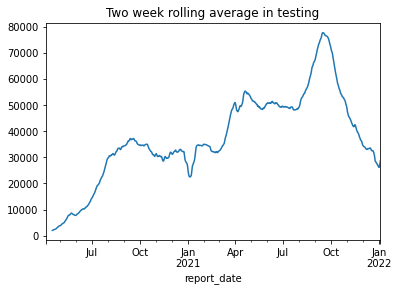

In [29]:
df2.resample('D', on='report_date').daily_output_unique_individuals.sum().rolling(14).mean().plot(title='Two week rolling average in testing')

# How many people are tested each month?

### Monthly totals arranged from highest to lowest

Remove **sort_values(ascending=False)** to arrange it by date.

In [30]:
df2.resample('M', on='report_date').daily_output_unique_individuals.sum().sort_values(ascending=False)

report_date
2021-09-30    2270631.0
2021-08-31    1876508.0
2021-10-31    1674413.0
2021-04-30    1571579.0
2021-07-31    1534758.0
2021-05-31    1525652.0
2021-06-30    1511158.0
2021-03-31    1378549.0
2021-11-30    1160857.0
2020-09-30    1073189.0
2020-10-31    1027587.0
2020-08-31    1017208.0
2021-01-31    1013076.0
2021-12-31     943211.0
2020-12-31     929690.0
2021-02-28     906997.0
2020-11-30     894039.0
2020-07-31     768793.0
2020-06-30     360407.0
2020-05-31     232175.0
2022-01-31     143229.0
2020-04-30      81089.0
Name: daily_output_unique_individuals, dtype: float64

<AxesSubplot:title={'center':'Testing slumps below 100k in Dec 2021'}, xlabel='report_date'>

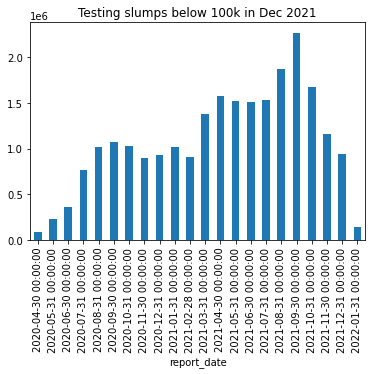

In [31]:
df2.resample('M', on='report_date').daily_output_unique_individuals.sum().plot(kind="bar", title="Testing slumps below 100k in Dec 2021")


# Where do most positive individuals get tested?

Top 25

### Cumulative

In [33]:
df2.groupby("facility_name").daily_output_positive_individuals.sum().sort_values(ascending=False).head(25)

facility_name
Philippine Red Cross - Port Area                                          152726.0
Detoxicare Molecular Diagnostics Laboratory                               147668.0
Philippine Red Cross (PRC)                                                 91577.0
Research Institute for Tropical Medicine (RITM)                            74899.0
Baguio General Hospital and Medical Center                                 69933.0
Philippine Red Cross Logistics & Multipurpose Center                       68160.0
Jose B. Lingad Memorial General Hospital                                   63519.0
Chinese General Hospital                                                   59148.0
Cebu TB Reference Laboratory - Molecular Facility for COVID-19 Testing     58070.0
Cagayan Valley Medical Center Molecular Laboratory                         54041.0
Southern Philippines Medical Center (SPMC)                                 51476.0
Ilocos Training and Regional Medical Center                              

### Monthly

Ranked from highest to lowest number of tests.

In [34]:
df2.groupby("facility_name").resample('M', on='report_date').daily_output_positive_individuals.sum().sort_values(ascending=False).head(25)

facility_name                                                           report_date
Philippine Red Cross - Port Area                                        2021-09-30     27547.0
                                                                        2021-08-31     23943.0
Detoxicare Molecular Diagnostics Laboratory                             2021-09-30     21316.0
Philippine Red Cross - Port Area                                        2021-04-30     20038.0
Detoxicare Molecular Diagnostics Laboratory                             2021-04-30     18665.0
Philippine Red Cross (PRC)                                              2021-09-30     18480.0
Ilocos Training and Regional Medical Center                             2021-09-30     17270.0
Baguio General Hospital and Medical Center                              2021-09-30     15865.0
Philippine Red Cross - Port Area                                        2021-03-31     15852.0
Detoxicare Molecular Diagnostics Laboratory                  

### Per testing site

Just change the name of the testing site after **df2.facility_name** to check other facilities.
Data show total monthly tests conducted per each facility.

In [35]:
df2[df2.facility_name=="Philippine Red Cross - Port Area"].resample('M', on='report_date').daily_output_positive_individuals.sum()

report_date
2020-05-31      205.0
2020-06-30      482.0
2020-07-31     7488.0
2020-08-31    10269.0
2020-09-30     8200.0
2020-10-31     1880.0
2020-11-30     2090.0
2020-12-31     2090.0
2021-01-31     1585.0
2021-02-28     3189.0
2021-03-31    15852.0
2021-04-30    20038.0
2021-05-31     8407.0
2021-06-30     4583.0
2021-07-31     5584.0
2021-08-31    23943.0
2021-09-30    27547.0
2021-10-31     4570.0
2021-11-30     1031.0
2021-12-31     1158.0
2022-01-31     2535.0
Freq: M, Name: daily_output_positive_individuals, dtype: float64

# How many individuals test positive every day?

In [23]:
df2.resample('D', on='report_date').daily_output_positive_individuals.sum().tail(25)

report_date
2021-12-11      382.0
2021-12-12      213.0
2021-12-13      314.0
2021-12-14      359.0
2021-12-15      335.0
2021-12-16      330.0
2021-12-17      230.0
2021-12-18      225.0
2021-12-19      201.0
2021-12-20      278.0
2021-12-21      362.0
2021-12-22      398.0
2021-12-23      418.0
2021-12-24      453.0
2021-12-25      315.0
2021-12-26      481.0
2021-12-27     1271.0
2021-12-28     2062.0
2021-12-29     3155.0
2021-12-30     4391.0
2021-12-31     5475.0
2022-01-01     4274.0
2022-01-02     6927.0
2022-01-03    14164.0
2022-01-04    19250.0
Freq: D, Name: daily_output_positive_individuals, dtype: float64

# Turnaround time

The number of people that test positive each day does not match cases reported each day. And it's partly because of delays in testing results. Hence some results reported today could be from tests days ago. What's the average turnaround time in hours for tests?

In [37]:
df2.avg_turnaround_time.value_counts().head(3)

48.0    36248
24.0    30307
72.0     7583
Name: avg_turnaround_time, dtype: int64

# Positivity rate

Computed by dividing the number of positive tests out of the total tests conducted each day. The World Health Organization considers 5% and below positivity rate as the virus spread being under control.

### Daily

In [27]:
df2.resample('D', on='report_date').daily_output_positive_individuals.sum() / df2.resample('D', on='report_date').daily_output_unique_individuals.sum() * 100


report_date
2020-04-03    22.192982
2020-04-04    23.847113
2020-04-05     1.162791
2020-04-06    10.176471
2020-04-07     6.706231
2020-04-08     6.788079
2020-04-09     9.653092
2020-04-10    12.299035
2020-04-11     9.677419
2020-04-12    14.385965
2020-04-13    17.972350
2020-04-14     9.185347
2020-04-15    16.533333
2020-04-16     8.997135
2020-04-17    10.727857
2020-04-18     7.738584
2020-04-19     8.847648
2020-04-20     5.983642
2020-04-21     8.641115
2020-04-22    16.767956
2020-04-23     6.655931
2020-04-24     6.959443
2020-04-25     9.123840
2020-04-26     7.378741
2020-04-27     6.571816
2020-04-28     7.013983
2020-04-29     3.925085
2020-04-30     8.496460
2020-05-01     7.151947
2020-05-02     9.216590
2020-05-03     6.975708
2020-05-04     9.370425
2020-05-05     7.353166
2020-05-06     8.429044
2020-05-07     6.165274
2020-05-08     6.200289
2020-05-09     6.788219
2020-05-10     4.750485
2020-05-11     5.543810
2020-05-12     4.898966
2020-05-13     4.677162
2020

# Save entire case file into one CSV

Just remove the hashtag!

While your testing data is in one CSV, cases are not. So now, you have the option to save it into one CSV. Note that you do not need to do this if you're using the dataframes (df) you generated above to process the data in Jupyter Notebook anytime.

In [ ]:
#df.to_csv("covidcases.csv", index=False)

In [38]:
#pd.read_csv("covidcases.csv")